In [14]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [15]:
import pandas as pd

In [16]:
#Data Cleaning
def clean_data(filepath="data_prescriptions.csv"):
  df= pd.read_csv(filepath)

  #Convert_dates
  df['Prescription_Date']= pd.to_datetime(df['Prescription_Date'], dayfirst= True,errors="coerce")

  #Handle Missing Values
  df.fillna({"Doctor_Name": "Unknown", "Specialty":"Unknown"}, inplace = True)

  #Remove Duplicates
  df.drop_duplicates(inplace=True)

  return df






In [17]:
#Analysis
def analyze_prescription(df):
  insights= {}

  #Top 10 medicines
  insights["top_medicines"]= df['Medicine_Name'].value_counts().head(10)

  #Speciality-wise prescription counts
  insights["speciality_counts"]=df.groupby("Specialty")["Prescription_ID"].count()

  #City-wise trend
  insights["city_counts"]= df.groupby("City")["Prescription_ID"].count()

  #Monthly trend
  df["Month"]= df["Prescription_Date"].dt.to_period("M")
  insights["monthly_trend"]= df.groupby("Month")["Prescription_ID"].count()

  return insights

  #for k,v in results.items():
    #print(f"\n{k.upper()}:\n{v}")





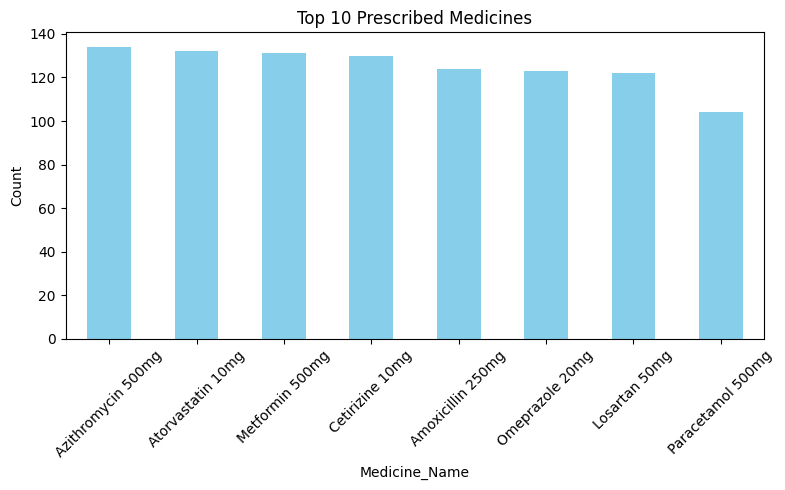

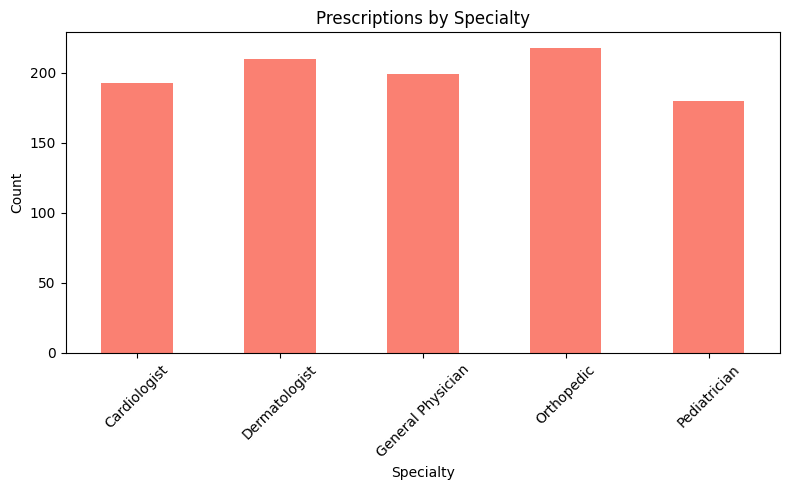

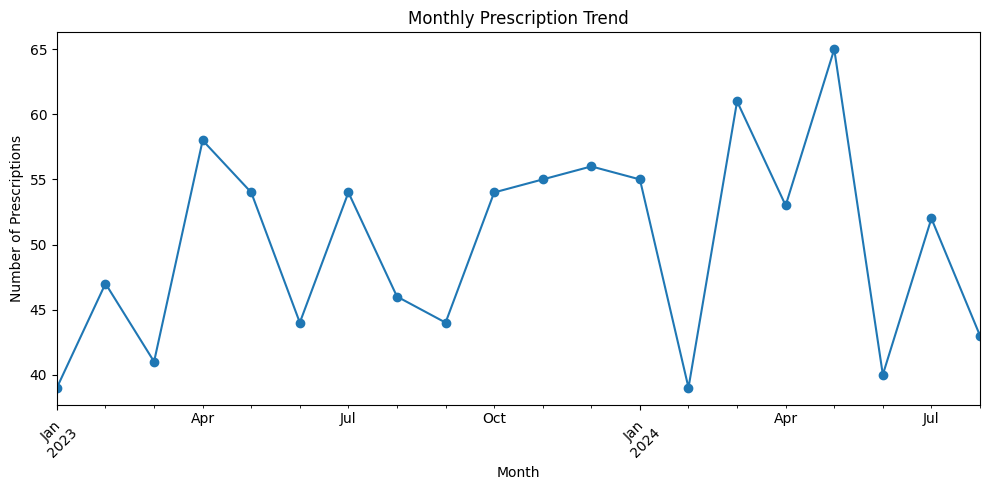

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = clean_data(filepath="data_prescriptions.csv")
insights = analyze_prescription(df)

# Plot Top Medicines
plt.figure(figsize=(8,5))
insights["top_medicines"].plot(kind="bar", color="skyblue")
plt.title("Top 10 Prescribed Medicines")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Specialty-wise prescriptions
plt.figure(figsize=(8,5))
insights["speciality_counts"].plot(kind="bar", color="salmon")
plt.title("Prescriptions by Specialty")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly trend
plt.figure(figsize=(10,5))
insights["monthly_trend"].plot(kind="line", marker="o")
plt.title("Monthly Prescription Trend")
plt.ylabel("Number of Prescriptions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()